In [1]:
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

import matplotlib.pyplot as plt

import seaborn as sns           

import numpy as np

import scipy.stats as stats
import math

pd.set_option('display.max_rows',1600)
pd.set_option('display.max_columns',1600)

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

from sklearn.decomposition import PCA

from sklearn.linear_model import LinearRegression, SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, BaggingRegressor,
                             AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score

from sklearn.metrics import r2_score, mean_squared_error, make_scorer


In [2]:
mercedes_df=pd.read_csv('Mercedes.csv', error_bad_lines=False)

mercedes_df
mercedes_df.columns = mercedes_df.columns.str.strip()
mercedes_df.head()

y=mercedes_df['y']
mercedes_df.drop(columns='y',inplace=True)
y = np.log(y)

mercedes_df.shape 

(4209, 377)

In [3]:
missing_value_df=pd.DataFrame({'Column_Name':mercedes_df.columns,
                             'missing_value_count':mercedes_df.isnull().sum(),
                             'missing_value_percent':mercedes_df.isnull().sum()/mercedes_df.shape[0]*100})

missing_value_df.sort_values(by='missing_value_percent',ascending=False)

cols_drop=list(missing_value_df[missing_value_df['missing_value_percent']>50]['Column_Name'])

mercedes_df.shape
cols_drop

[]

In [4]:
for col in mercedes_df.columns:
    if mercedes_df[col].nunique()==mercedes_df.shape[0] or mercedes_df[col].nunique()==1:
        cols_drop.append(col)
cols_drop


['ID',
 'X11',
 'X93',
 'X107',
 'X233',
 'X235',
 'X268',
 'X289',
 'X290',
 'X293',
 'X297',
 'X330',
 'X347']

In [5]:
mercedes_df.drop(columns=cols_drop,inplace=True)
mercedes_df.shape

(4209, 364)

In [6]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(mercedes_df,y,test_size=0.2,random_state=43)

X_train.shape

(3367, 364)

In [7]:
for col in X_train.columns:
    if X_train[col].dtype=='object':
        X_train[col]=X_train[col].fillna(X_train[col].mode()[0]).astype(object)
        X_test[col]=X_test[col].fillna(X_train[col].mode()[0]).astype(object)
    
    else:
        X_train[col]=X_train[col].fillna(X_train[col].mean())
        X_test[col]=X_test[col].fillna(X_train[col].mean())
        
X_train.dtypes

X0      object
X1      object
X2      object
X3      object
X4      object
X5      object
X6      object
X8      object
X10      int64
X12      int64
X13      int64
X14      int64
X15      int64
X16      int64
X17      int64
X18      int64
X19      int64
X20      int64
X21      int64
X22      int64
X23      int64
X24      int64
X26      int64
X27      int64
X28      int64
X29      int64
X30      int64
X31      int64
X32      int64
X33      int64
X34      int64
X35      int64
X36      int64
X37      int64
X38      int64
X39      int64
X40      int64
X41      int64
X42      int64
X43      int64
X44      int64
X45      int64
X46      int64
X47      int64
X48      int64
X49      int64
X50      int64
X51      int64
X52      int64
X53      int64
X54      int64
X55      int64
X56      int64
X57      int64
X58      int64
X59      int64
X60      int64
X61      int64
X62      int64
X63      int64
X64      int64
X65      int64
X66      int64
X67      int64
X68      int64
X69      int64
X70      i

In [8]:
from sklearn.preprocessing import LabelEncoder
import numpy as np


class LabelEncoderExt(object):
    def __init__(self):
        """
        It differs from LabelEncoder by handling new classes and providing a value for it [Unknown]
        Unknown will be added in fit and transform will take care of new item. It gives unknown class id
        """
        self.label_encoder = LabelEncoder()
        # self.classes_ = self.label_encoder.classes_

    def fit(self, data_list):
        """
        This will fit the encoder for all the unique values and introduce unknown value
        :param data_list: A list of string
        :return: self
        """
        self.label_encoder = self.label_encoder.fit(list(data_list) + ['Unknown'])
        self.classes_ = self.label_encoder.classes_

        return self

    def transform(self, data_list):
        """
        This will transform the data_list to id list where the new values get assigned to Unknown class
        :param data_list:
        :return:
        """
        new_data_list = list(data_list)
        for unique_item in np.unique(data_list):
            if unique_item not in self.label_encoder.classes_:
                new_data_list = ['Unknown' if x==unique_item else x for x in new_data_list]

        return self.label_encoder.transform(new_data_list)
    
le=LabelEncoderExt()

for col in X_train.columns:
    if X_train[col].dtype=='object':
        le.fit(X_train[col])
        X_train[col]=le.transform(X_train[col])
        X_test[col]=le.transform(X_test[col])


Text(0, 0.5, 'Explained veriance ratio')

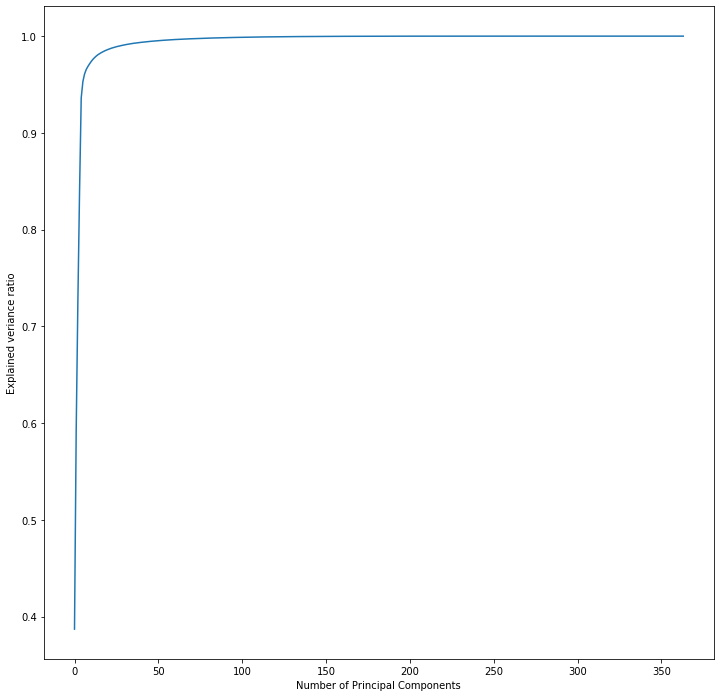

In [9]:
from sklearn.decomposition import PCA

pca = PCA()

X_train_pca_df = pd.DataFrame(pca.fit_transform(X_train))

plt.figure(figsize=(12,12))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel("Number of Principal Components")
plt.ylabel("Explained veriance ratio")

In [10]:
pca1 = PCA(n_components=45)

X_train_pca_df = pd.DataFrame(pca1.fit_transform(X_train), columns=list(range(0,45)))
X_test_pca_df =  pd.DataFrame(pca1.transform(X_test))

In [11]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif["VIF Factor"] = [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])]
vif["features"] = X_train.columns

In [12]:
vif.sort_values(by='VIF Factor', ascending=True)

,VIF Factor,features
194,0.000000,X205
312,1.033055,X332
4,1.038860,X4
38,1.105322,X42
274,1.108610,X288
98,1.137795,X104
275,1.140220,X291
300,1.160110,X319
5,1.224005,X5
7,1.234922,X8


In [13]:
vif_pca = pd.DataFrame()
vif_pca["VIF Factor"] = [variance_inflation_factor(X_train_pca_df.values, i) for i in range(X_train_pca_df.shape[1])]
vif_pca["features"] = X_train_pca_df.columns
vif_pca.sort_values(by='VIF Factor', ascending=True)

,VIF Factor,features
30,1.0,30
24,1.0,24
42,1.0,42
3,1.0,3
32,1.0,32
23,1.0,23
8,1.0,8
34,1.0,34
28,1.0,28
4,1.0,4


In [14]:
X_train_pca_df.to_csv('pca_data_beforeScaling.csv')

columns = []
print ("cName","\t", "PearSon Coree","\t\t", "pvalue","\n")
for col in X_train_pca_df.columns:
    corre, pvalue = stats.pearsonr(X_train_pca_df[col], y_train)
    
    if (pvalue < 0.03):
        print (col,"\t", corre*100,"\t", pvalue)
        columns.append(col)
print("\n No of PCAs Highly Correlate with Target Veriable: ==>:", len(columns), "Outof_Available PCAs",X_train_pca_df.shape[1])

cName 	 PearSon Coree 		 pvalue 

0 	 18.448135520788913 	 3.695290765043714e-27
2 	 -10.568688069487504 	 7.870484965011356e-10
6 	 16.661768938965878 	 2.1881845528834e-22
7 	 -33.10754023273365 	 6.102401568861994e-87
8 	 -5.734086554611081 	 0.0008723470429575984
9 	 29.363274161018953 	 6.097871255933114e-68
10 	 6.22436676680985 	 0.00030161915925559736
11 	 -32.89944768637154 	 8.21426693879025e-86
12 	 9.596080156441221 	 2.4187926772640357e-08
13 	 -18.999864905516503 	 9.783231895245929e-29
15 	 9.77322973648661 	 1.3273827847713336e-08
16 	 34.76789417371242 	 2.8628347264000087e-96
19 	 4.550906898739072 	 0.00826396404539752
22 	 7.308795535444776 	 2.1850119934537622e-05
24 	 5.748390277897732 	 0.0008466551490570234
27 	 -3.9338991821843345 	 0.022447180807138322
32 	 -8.519470757999809 	 7.396118161334644e-07
40 	 -4.262376569544162 	 0.013380196690625424
44 	 -3.833277459489892 	 0.0261293679056881

 No of PCAs Highly Correlate with Target Veriable: ==>: 19 Outof_Avail

In [15]:
X_train_pca_df_final = X_train_pca_df[columns]
X_test_pca_df_final = X_test_pca_df[columns]

In [16]:
mMS = MinMaxScaler()
for col in X_test_pca_df_final.columns:
    X_train_pca_df_final[col] = mMS.fit_transform(np.array(X_train_pca_df_final[col]).reshape(-1,1))
    X_test_pca_df_final[col] = mMS.transform(np.array(X_test_pca_df_final[col]).reshape(-1,1))
    
X_train_pca_df_final.to_csv('pca_data_afterscaling.csv')

In [17]:
linRig = LinearRegression()
linRig.fit(X_train_pca_df_final, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [18]:
y_predict_linRig = linRig.predict(X_test_pca_df_final)

print("Train Accuracy(R2 Score): ===========>", linRig.score(X_train_pca_df_final, y_train), "\n")
print("Test Accuracuy(R2 Score): ===========>", linRig.score(X_test_pca_df_final, y_test), "\n")

print("MeanSquareError: ====================>", mean_squared_error(y_test, y_predict_linRig), "\n")
print("RootMeanSquareError: ================>", np.sqrt(mean_squared_error(y_test, y_predict_linRig)))

Train Accuracy(R2 Score): ===========> 0.5827446810922414 

Test Accuracuy(R2 Score): ===========> 0.5424186114001777 

MeanSquareError: ====================> 0.006591889452398167 

RootMeanSquareError: ================> 0.08119045173170406


In [19]:
decTR = DecisionTreeRegressor(criterion = 'mse', max_depth=5, min_samples_split=10, min_samples_leaf=3)
decTR.fit(X_train_pca_df_final, y_train)

DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
                      max_leaf_nodes=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=3,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      presort=False, random_state=None, splitter='best')

In [20]:
y_predict_decTR = decTR.predict(X_test_pca_df_final)

print("Train Accuracy(R2 Score): ===========>", decTR.score(X_train_pca_df_final, y_train), "\n")
print("Test Accuracuy(R2 Score): ===========>", decTR.score(X_test_pca_df_final, y_test), "\n")

print("MeanSquareError: ====================>", mean_squared_error(y_test, y_predict_decTR), "\n")
print("RootMeanSquareError: ================>", np.sqrt(mean_squared_error(y_test, y_predict_decTR)))

Train Accuracy(R2 Score): ===========> 0.5571364965302383 

Test Accuracuy(R2 Score): ===========> 0.4624142913884916 

MeanSquareError: ====================> 0.007744426785363296 

RootMeanSquareError: ================> 0.08800242488342748


In [21]:
rfR = RandomForestRegressor(criterion= 'mse', n_estimators=13, max_depth=6, min_samples_split=25, max_leaf_nodes=12)
rfR.fit(X_train_pca_df_final, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=6,
                      max_features='auto', max_leaf_nodes=12,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=25,
                      min_weight_fraction_leaf=0.0, n_estimators=13,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [22]:
y_predict_rfR = rfR.predict(X_test_pca_df_final)


print("Train Accuracy(R2 Score): ===========>", rfR.score(X_train_pca_df_final, y_train), "\n")
print("Test Accuracuy(R2 Score): ===========>", rfR.score(X_test_pca_df_final, y_test), "\n")

print("MeanSquareError: ====================>", mean_squared_error(y_test, y_predict_rfR), "\n")
print("RootMeanSquareError: ================>", np.sqrt(mean_squared_error(y_test, y_predict_rfR)))

Train Accuracy(R2 Score): ===========> 0.5829442244010896 

Test Accuracuy(R2 Score): ===========> 0.5001763017426639 

MeanSquareError: ====================> 0.0072004295775294925 

RootMeanSquareError: ================> 0.08485534501449801


In [23]:
bagR = BaggingRegressor(DecisionTreeRegressor(max_depth=10, min_samples_split=20, min_samples_leaf=2), \
                        max_samples=0.2, n_estimators=10, max_features=1.0)
bagR.fit(X_train_pca_df_final, y_train)
y_predict_bagR = bagR.predict(X_test_pca_df_final)


print("Train Accuracy(R2 Score): ===========>", bagR.score(X_train_pca_df_final, y_train), "\n")
print("Test Accuracuy(R2 Score): ===========>", bagR.score(X_test_pca_df_final, y_test), "\n")

print("MeanSquareError: ====================>", mean_squared_error(y_test, y_predict_bagR), "\n")
print("RootMeanSquareError: ================>", np.sqrt(mean_squared_error(y_test, y_predict_bagR)))

Train Accuracy(R2 Score): ===========> 0.6126827990378878 

Test Accuracuy(R2 Score): ===========> 0.5112905356210927 

MeanSquareError: ====================> 0.007040318605142951 

RootMeanSquareError: ================> 0.08390660644515992


In [24]:
adbR = AdaBoostRegressor(DecisionTreeRegressor(criterion='friedman_mse', max_depth=5, max_features = "auto", \
                                               min_samples_leaf=3))
adbR.fit(X_train_pca_df_final, y_train)

AdaBoostRegressor(base_estimator=DecisionTreeRegressor(criterion='friedman_mse',
                                                       max_depth=5,
                                                       max_features='auto',
                                                       max_leaf_nodes=None,
                                                       min_impurity_decrease=0.0,
                                                       min_impurity_split=None,
                                                       min_samples_leaf=3,
                                                       min_samples_split=2,
                                                       min_weight_fraction_leaf=0.0,
                                                       presort=False,
                                                       random_state=None,
                                                       splitter='best'),
                  learning_rate=1.0, loss='linear', n_estimators=50,
               

In [25]:
y_predict_adbR = adbR.predict(X_test_pca_df_final)


print("Train Accuracy(R2 Score): ===========>", adbR.score(X_train_pca_df_final, y_train), "\n")
print("Test Accuracuy(R2 Score): ===========>", adbR.score(X_test_pca_df_final, y_test), "\n")

print("MeanSquareError: ====================>", mean_squared_error(y_test, y_predict_adbR), "\n")
print("RootMeanSquareError: ================>", np.sqrt(mean_squared_error(y_test, y_predict_adbR)))

Train Accuracy(R2 Score): ===========> 0.4705718853424582 

Test Accuracuy(R2 Score): ===========> 0.3197795819731446 

MeanSquareError: ====================> 0.00979921367129406 

RootMeanSquareError: ================> 0.09899097772673053


In [26]:
models = {
           'LR': LinearRegression(), 
          'DTR': DecisionTreeRegressor(), 
          'RFS': RandomForestRegressor(), 
          'ADB': AdaBoostRegressor()
         }

for mName, model in models.items():
    obj = models[mName]
    obj.fit(X_train_pca_df, y_train)
    y_predict = obj.predict(X_test_pca_df)
    
    train_acc = obj.score(X_train_pca_df, y_train)
    test_acc =  obj.score(X_test_pca_df, y_test)
    
    R2Square = r2_score(y_test, y_predict)
    MSquareE = mean_squared_error(y_test, y_predict)
    
    print("\n\n")
    print("{} Model TrainAcc: ====>{} TestAccuracy          : ====>{}".format(mName, train_acc, test_acc))
    print("{} Model R2 Score: ====>{} Model MeanSquare Error: ====>{}".format(mName, R2Square, MSquareE))




LR Model TrainAcc: ====>0.5925429270054484 TestAccuracy          : ====>0.5479270132497073
LR Model R2 Score: ====>0.5479270132497073 Model MeanSquare Error: ====>0.006512535752802573



DTR Model TrainAcc: ====>0.9801843047006131 TestAccuracy          : ====>0.1037585934148305
DTR Model R2 Score: ====>0.10375859341483051 Model MeanSquare Error: ====>0.012911198798861217



RFS Model TrainAcc: ====>0.899561565758025 TestAccuracy          : ====>0.4756143664530077
RFS Model R2 Score: ====>0.4756143664530077 Model MeanSquare Error: ====>0.007554267312630141



ADB Model TrainAcc: ====>0.4026274052900223 TestAccuracy          : ====>0.34525437489862276
ADB Model R2 Score: ====>0.34525437489862276 Model MeanSquare Error: ====>0.009432225365014087
